# Testbench for SLMLab.dll

Author(s): *Martin Fränzl*


## Required packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from ctypes import *
from skimage.io import imread
from skimage.transform import resize

## Load DLL

In [2]:
dll = CDLL('SLMLab/x64/Debug/SLMLab.dll', mode=RTLD_GLOBAL) # cdll.LoadLibrary('SLMLab/x64/Debug/SLMLab.dll')

In [3]:
startCUDA = dll.startCUDA
generatePhase = dll.generatePhase
stopCUDA = dll.stopCUDA

## Start CUDA

In [4]:
pSLMstart = np.zeros((512*512, 1)) # dtype=np.uint16
pSLMstart = np.copy(pSLMstart).astype('float') 

startCUDA.argtypes = [POINTER(c_float), c_int]
startCUDA(pSLMstart.ctypes.data_as(POINTER(c_float)), c_int(0)) #c_int(0)

0

## Open Image

In [6]:
image = imread('Image.png')
image = resize(image[:,:,0], (512, 512))

C:\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


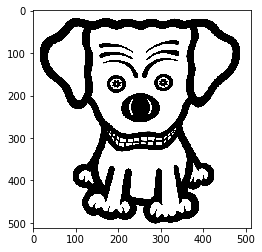

In [7]:
plt.imshow(image, cmap='gray');

## Generate Phase

In [24]:
pSLM = np.zeros((512*512, 1)) # dtype=np.uint16
pSLM = np.copy(pSLM).astype('uint16') 

dAmplitude = image.reshape((512*512, 1))/image.max() # desired amplitude
dAmplitude = np.copy(dAmplitude).astype('float')

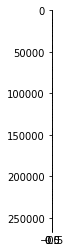

In [25]:
plt.imshow(dAmplitude, cmap='gray');

In [10]:
generatePhase.argtypes = [POINTER(c_uint16), POINTER(c_float), c_int]
generatePhase(pSLM.ctypes.data_as(POINTER(c_uint16)), dAmplitude.ctypes.data_as(POINTER(c_float)), 10)

0

In [22]:
pSLM.max()

0

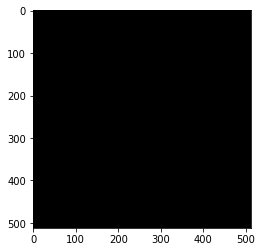

In [12]:
plt.imshow(pSLM.reshape(512, 512), cmap='gray');

## Generate Phase

In [13]:
image1D = image.reshape(512*512)
dAmplitude_list = (image1D/image1D.max()).astype(np.float) # desired amplitude

In [14]:
dAmplitude = (c_float * len(dAmplitude_list))(*dAmplitude_list) 
pSLM = (c_uint16 * (512 * 512))() 

#pSLM = np.zeros((512*512), dtype=np.uint16)
#image1D = image.reshape(512*512)
#dAmplitude = (image1D/image1D.max()).astype(np.float) # desired amplitude

In [15]:
generatePhase.argtypes = (POINTER(c_uint16), POINTER(c_float), c_int)
generatePhase(pSLM, dAmplitude, 10)

0

In [16]:
#list(pSLM)

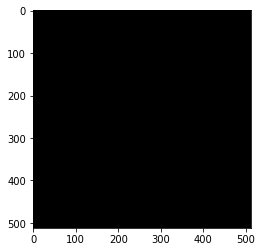

In [17]:
plt.imshow(np.array(list(pSLM)).reshape(512, 512), cmap='gray');

## Generate Phase (NumPy Tests)

In [18]:
pSLM = np.zeros((512*512), dtype=np.uint16)
image1D = image.reshape(512*512)
dAmplitude = (image1D/image1D.max()).astype(np.float) # desired amplitude

In [19]:
pSLM

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [20]:
#plt.imshow(dAmplitude.reshape(512, 512), cmap='gray');

In [21]:
generatePhase(c_void_p(pSLM.ctypes.data), c_void_p(dAmplitude.ctypes.data), c_int(10)) #c_int(0)

ArgumentError: argument 1: <class 'TypeError'>: expected LP_c_ushort instance instead of c_void_p

In [ ]:
pSLM

In [ ]:
plt.imshow(pSLM.reshape(512, 512), cmap='gray');

## Free DLL

In [15]:
kernel32 = WinDLL('kernel32', use_last_error=True)    
kernel32.FreeLibrary.argtypes = [wintypes.HMODULE]

kernel32.FreeLibrary(dll._handle)

1